### Project:- Air quality prediction

Dataset:

Dataset Air quality of an Italian city. The dataset contains 9358 instances of hourly averaged responses
from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multi-sensor
device. The device was located on the field in a significantly polluted area, at road level, within an Italian
city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely
available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth
hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides
(NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.
Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De
Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors
concentration estimation capabilities. Missing values are tagged with -200 value. " 

Objective:

So we will predict the Relative Humidity of a given point of time based on the all other attributes affecting the change in RH.

### Load the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read and Analyse the dataset

In [2]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
data=pd.read_csv(r"C:\Users\HELLO\Favorites\Downloads\Recruitment task\AirQualityUCI.csv",header=None,
                 skiprows=1,names=col,na_filter=True, na_values=-200,usecols=use)
data.head()

DATE      TIME  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0  10/3/2004  18.00.00    2.6      1360.0    150.0     11.9        1046.0   
1  10/3/2004  19.00.00    2.0      1292.0    112.0      9.4         955.0   
2  10/3/2004  20.00.00    2.2      1402.0     88.0      9.0         939.0   
3  10/3/2004  21.00.00    2.2      1376.0     80.0      9.2         948.0   
4  10/3/2004  22.00.00    1.6      1272.0     51.0      6.5         836.0   

   NOX_GT  PT08_S3_NOX  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0   166.0       1056.0   113.0       1692.0      1268.0  13.6  48.9  0.7578  
1   103.0       1174.0    92.0       1559.0       972.0  13.3  47.7  0.7255  
2   131.0       1140.0   114.0       1555.0      1074.0  11.9  54.0  0.7502  
3   172.0       1092.0   122.0       1584.0      1203.0  11.0  60.0  0.7867  
4   131.0       1205.0   116.0       1490.0      1110.0  11.2  59.6  0.7888

In [3]:
#See the end records of dataframe
data.tail()

DATE      TIME  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
9352  4/4/2005  10.00.00    3.1      1314.0      NaN     13.5        1101.0   
9353  4/4/2005  11.00.00    2.4      1163.0      NaN     11.4        1027.0   
9354  4/4/2005  12.00.00    2.4      1142.0      NaN     12.4        1063.0   
9355  4/4/2005  13.00.00    2.1      1003.0      NaN      9.5         961.0   
9356  4/4/2005  14.00.00    2.2      1071.0      NaN     11.9        1047.0   

      NOX_GT  PT08_S3_NOX  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
9352   472.0        539.0   190.0       1374.0      1729.0  21.9  29.3  0.7568  
9353   353.0        604.0   179.0       1264.0      1269.0  24.3  23.7  0.7119  
9354   293.0        603.0   175.0       1241.0      1092.0  26.9  18.3  0.6406  
9355   235.0        702.0   156.0       1041.0       770.0  28.3  13.5  0.5139  
9356   265.0        654.0   168.0       1129.0       816.0  28.5  13.1  0.5028

In [4]:
data.dtypes

DATE             object
TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [5]:
#drop end rows with NaN values
data.dropna(how='all',inplace=True)
#drop RH NAN rows
data.dropna(thresh=10,axis=0,inplace=True)

In [6]:
data.shape

(8991, 15)

In [7]:
data.describe()

CO_GT   PT08_S1_CO      NMHC_GT      C6H6_GT  PT08_S2_NMHC  \
count  7345.000000  8990.000000   888.000000  8991.000000   8990.000000   
mean      2.323839  1099.796663   218.385023    10.227705    939.110901   
std      16.699238   217.064514   206.605184    15.704237    266.815872   
min       0.100000   647.000000     7.000000     0.100000    383.000000   
25%       1.100000   937.000000    66.000000     4.400000    734.250000   
50%       1.800000  1063.000000   145.000000     8.200000    909.000000   
75%       2.800000  1231.000000   297.000000    14.000000   1116.000000   
max    1428.000000  2040.000000  1189.000000  1321.000000   2214.000000   

            NOX_GT  PT08_S3_NOX       NO2_GT  PT08_S4_NO2   PT08_S5_O3  \
count  7397.000000  8990.000000  7394.000000  8991.000000  8991.000000   
mean    242.230093   835.526029   112.370571  1456.247025  1022.727906   
std     206.327903   256.813200    51.419773   346.194420   398.575087   
min       2.000000   322.000000     2.000000   551.000000    18.600000   
25%      97.000000   658.000000    77.000000  1227.000000   731.000000   
50%     178.000000   806.000000   109.000000  1463.000000   963.000000   
75%     321.000000   969.750000   140.000000  1673.500000  1273.000000   
max    1479.000000  2683.000000  1779.000000  2775.000000  2523.000000   

                 T           RH           AH  
count  8991.000000  8991.000000  8990.000000  
mean     18.322122    49.227974     1.025509  
std       8.841629    17.324092     0.403830  
min      -1.900000     1.214600     0.184700  
25%      11.800000    35.800000     0.736750  
50%      17.800000    49.500000     0.995350  
75%      24.400000    62.500000     1.313750  
max      57.200000    88.700000     2.231000

### Data cleaning

In [8]:
#Split hour from time into new column
data['HOUR']=data['TIME'].apply(lambda x: int(x.split('.')[0]))
data.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [9]:
# How many missing values now?
print('Count of missing values:\n',data.shape[0]-data.count())

Count of missing values:
 DATE               0
TIME               0
CO_GT           1646
PT08_S1_CO         1
NMHC_GT         8103
C6H6_GT            0
PT08_S2_NMHC       1
NOX_GT          1594
PT08_S3_NOX        1
NO2_GT          1597
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 1
HOUR               0
dtype: int64


Fill missing value strategy
-CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour

-NMHC_GT will be dropped as it has 90% missing data

In [10]:
# #Format date column
data['DATE']=pd.to_datetime(data.DATE, format='%d/%m/%Y')   

In [11]:
# set the index as date
data.set_index('DATE',inplace=True)

In [12]:
#Create month column (Run once)
data['MONTH']=data.index.month     
data.reset_index(inplace=True)
#df_air.head()

In [13]:
# Drop column NMHC_GT; it has 90% missing data
data.drop('NMHC_GT',axis=1,inplace=True) 

In [14]:
# Fill NaN values with monthly average of particular hour
data['CO_GT']=data['CO_GT'].fillna(data.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
data['NOX_GT']=data['NOX_GT'].fillna(data.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
data['NO2_GT']=data['NO2_GT'].fillna(data.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [15]:
print('Left out missing value:',data.shape[0]-data.count())

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        1
C6H6_GT           0
PT08_S2_NMHC      1
NOX_GT          261
PT08_S3_NOX       1
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                1
HOUR              0
MONTH             0
dtype: int64


In [16]:
# Fill left out NaaN values with hourly average value

data['CO_GT']=data['CO_GT'].fillna(data.groupby(['HOUR'])['CO_GT'].transform('mean'))
data['NOX_GT']=data['NOX_GT'].fillna(data.groupby(['HOUR'])['NOX_GT'].transform('mean'))
data['NO2_GT']=data['NO2_GT'].fillna(data.groupby(['HOUR'])['NO2_GT'].transform('mean'))
data['PT08_S1_CO']=data['PT08_S1_CO'].fillna(data.groupby(['HOUR'])['PT08_S1_CO'].transform('mean'))
data['PT08_S2_NMHC']=data['PT08_S2_NMHC'].fillna(data.groupby(['HOUR'])['PT08_S2_NMHC'].transform('mean'))
data['PT08_S3_NOX']=data['PT08_S3_NOX'].fillna(data.groupby(['HOUR'])['PT08_S3_NOX'].transform('mean'))
data['AH']=data['AH'].fillna(data.groupby(['HOUR'])['AH'].transform('mean'))

### Data Visualization

### Understand co-relation between variables

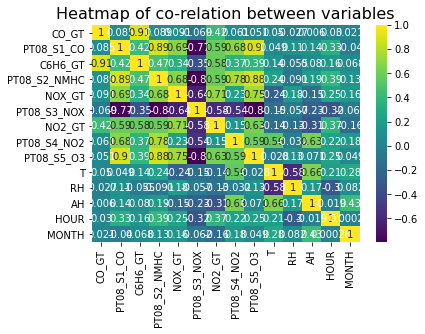

In [17]:
#Use heatmap to see corelation between variables
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

### Try to understand degree of linearity between RH output and other input features

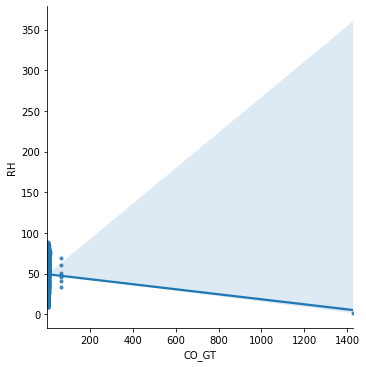

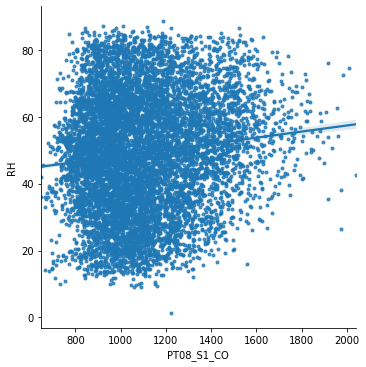

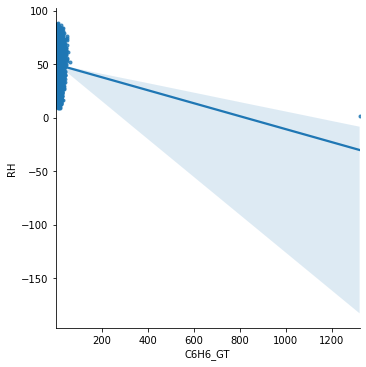

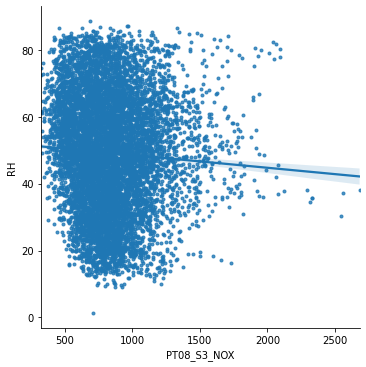

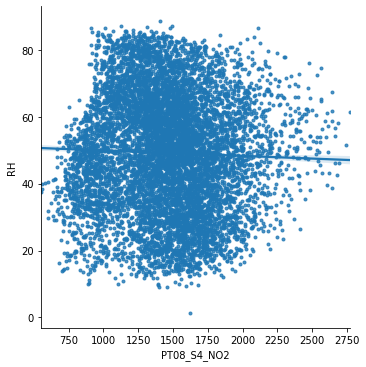

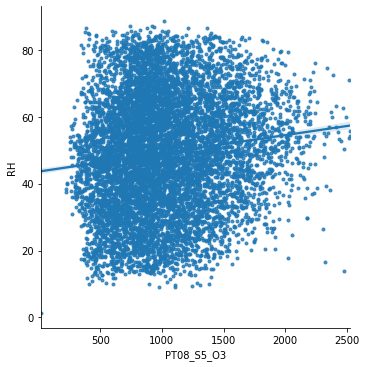

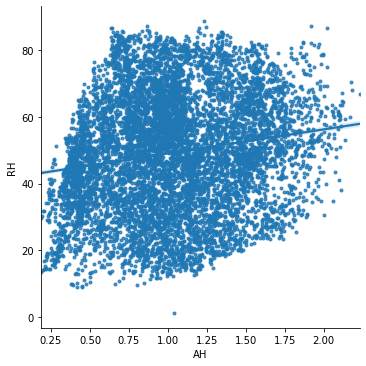

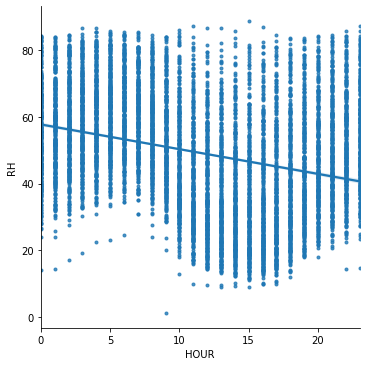

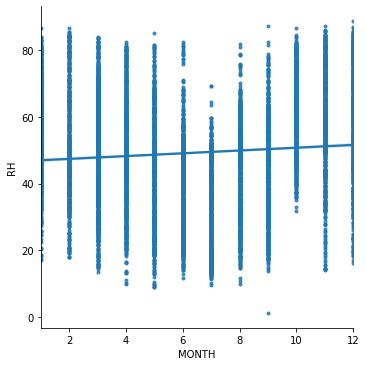

In [18]:
#plot all X-features against output variable RH
col_=data.columns.tolist()[2:]
for i in data.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=data,markers='.')

## Model building and predictions using different algorithms

## Linear Regression

In [19]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

In [20]:
### Define Feature (X) and Target (y)

X=data[col_].drop('RH',1)     #X-input features
y=data['RH']                    #y-input features

In [21]:
### Normalize Feature variable

ss=StandardScaler()     #initiatilise

In [22]:
X_std=ss.fit_transform(X)     #apply stardardisation

In [23]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)

In [24]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6293, 13)
Test data size: (2698, 13)


In [25]:
### Train the model

lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)          #fit the linear model on train data

In [26]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),lr_model.coef_))

Intercept: 49.06552271560337
--------------------------------
Slope:


[('CO_GT', -1.2531718621729477),
 ('PT08_S1_CO', 3.05866277711905),
 ('C6H6_GT', -13.60663667632722),
 ('PT08_S2_NMHC', -0.7538503222737456),
 ('NOX_GT', 2.9920530958707166),
 ('PT08_S3_NOX', -0.6507831480308817),
 ('NO2_GT', -1.3762966050845535),
 ('PT08_S4_NO2', 6.234410914864389),
 ('PT08_S5_O3', -1.0754503009183811),
 ('T', -20.086800189609338),
 ('AH', 12.371664736442602),
 ('HOUR', -0.7591570560617253),
 ('MONTH', 1.1812455996694435)]

In [27]:
### Prediction

y_pred=lr_model.predict(X_test)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 26.2487408485659


Feature engineering and testing model:
    
Try with multiple feature combination and see if RMSE is improving

In [28]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=data[feature]
    y=data['RH']
    X_std_one=ss.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [29]:
col_.remove('RH')        #remove output

In [30]:
print('List of features:',col_)    #print list of features

List of features: ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR', 'MONTH']


In [31]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
print('-------------------------')
print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['CO_GT', 'PT08_S1_CO'] 21.120249893029843
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX'] 49.314474415419234
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3'] 17.890500249557537
-------------------------
RMSE with Features as ['PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT'] 20.23485817276179
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH'] 26.697643585391553
-------------------------
RMSE with Features as ['PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T', 'AH', 'HOUR'] 26.9511705883365
-------------------------
RMSE with Features as ['CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC', 'NOX_GT', 

Conclusion of baseline linear regression model:

This means that we can predict RH using all the features together with RMSE as 26.24. Let us call it as baseline model.

### Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

In [33]:
## Fit the DT model and predict:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

In [34]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.3619104519044825


Conclusion:Decision Tree Regression

When decision tree regression has been applied we observe significant improvement of RMSE value to 1.36

### Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [36]:
### fit the RF model and predict

rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

In [37]:
# RMSE of RH prediction
# Calculate RMSE

print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.7384341184923647


#### Try to improve models

In [38]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [39]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters

In [40]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict

In [41]:
# Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 1.9995298210420267


Conclusion: Random Forest

Applying Random Forest regression the predicted RMSE has improved to 0.73, the default RF algorithm is giving better RMSE value than grid search applied different parameters.

### Support Vector Machine

In [42]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR()

In [43]:
sv_model=sv_reg.fit(X_train,y_train)    #train the model

In [44]:
y_pred_sv=sv_model.predict(X_test)         #predict

In [45]:
#Calculate RMSE of SVR
print('RMSE of SVR model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

RMSE of SVR model: 3.8148481511496426


Conclusion:

For designing the model for predicting RH, I have applied Linear Regression, Decision Tree, Random Forest, Support Vector Machine. When tested on test data below are RMSE obtained from different algorithms:

RMSE:

Linear Regression: 26.24

Decision Tree: 1.38

##### Random Forest: 0.74

Support Vector Machine: 3.81

#### Hence Random Forest algorithm provide the best prediction of RH using the features.